In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Nadam

In [6]:
df = pd.read_excel(r'defaultofcreditcardclients.xls')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,male,high school,married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,male,high school,single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,male,university,single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,male,high school,married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [7]:
df.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000,30000,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,NaN,2,5,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,female,university,single,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,18112,14030,15964,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15000.500000,167484.322667,NaN,NaN,NaN,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,NaN,NaN,NaN,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,NaN,NaN,NaN,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,NaN,NaN,NaN,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,NaN,NaN,NaN,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,NaN,NaN,NaN,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000


In [8]:
df.isnull().sum() 

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [9]:
df.drop(['ID'], axis=1,inplace= True)

In [10]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,female,university,married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,female,university,single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,female,university,single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,female,university,married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,male,university,married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,male,high school,married,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,male,high school,single,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,male,university,single,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,male,high school,married,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [11]:
data_cat = df.copy()

In [12]:
data_dummy = df.copy()

In [13]:
data_dummy = pd.get_dummies(data_dummy, drop_first= True).astype(int)

In [14]:
data_dummy.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT5,PAY_AMT6,default,SEX_male,EDUCATION_high school,EDUCATION_not educated,EDUCATION_others,EDUCATION_university,MARRIAGE_others,MARRIAGE_single
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,1,0,0,0,0,1,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,...,0,2000,1,0,0,0,0,1,0,1
2,90000,34,0,0,0,0,0,0,29239,14027,...,1000,5000,0,0,0,0,0,1,0,1
3,50000,37,0,0,0,0,0,0,46990,48233,...,1069,1000,0,0,0,0,0,1,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,689,679,0,1,0,0,0,1,0,0


In [15]:
data_cat.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,female,university,married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,female,university,single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,female,university,single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,female,university,married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,male,university,married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [16]:
inputs = data_dummy.drop('default', axis=1)
output = data_dummy['default']

X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [17]:
inputs = data_cat.drop('default', axis=1)
output = data_cat['default']

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

def train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    try:
        model.fit(X_train, y_train)
        
        y_pred_train = model.predict(X_train)
        y_prob_train = model.predict_proba(X_train)[:, 1]

        roc_prob_train = roc_auc_score(y_train, y_prob_train)
        gini_prob_train = roc_prob_train * 2 - 1
        confusion_matrix_result_train = confusion_matrix(y_train, y_pred_train)
        classification_report_result_train = classification_report(y_train, y_pred_train)
        
        print(f'Model Performance for {model_name}')
        print('Train Gini prob is', gini_prob_train * 100)
        print(classification_report_result_train)
        print(confusion_matrix_result_train)

        y_pred_test = model.predict(X_test)
        y_prob_test = model.predict_proba(X_test)[:, 1]

        roc_prob_test = roc_auc_score(y_test, y_prob_test)
        gini_prob_test = roc_prob_test * 2 - 1
        confusion_matrix_result_test = confusion_matrix(y_test, y_pred_test)
        classification_report_result_test = classification_report(y_test, y_pred_test)

        print(f'Model Performance for {model_name}')
        print('Test Gini prob is', gini_prob_test * 100)
        print(classification_report_result_test)
        print(confusion_matrix_result_test)

        return [gini_prob_train, gini_prob_test]

    except Exception as e:
        print(f"An error occurred while evaluating the model {model_name}: {e}")
        return None


In [19]:
models = []

xgb_model_def = XGBClassifier(random_state=42)
lgb_model_def = LGBMClassifier(random_state=42)
catboost_model_def = CatBoostClassifier(random_state=42)
catboost_model_custom = CatBoostClassifier(cat_features=['SEX', 'EDUCATION', 'MARRIAGE'], random_state=42)
random_classifier = RandomForestClassifier(random_state=42)
models.extend([
    ('XGBoost', xgb_model_def),
    ('LightGBM', lgb_model_def),
    ('CatBoost', catboost_model_def),
    ('CatBoost_Custom', catboost_model_custom),
    ('RandomeForest', random_classifier)
])

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
gini_df = pd.DataFrame(columns=['Model', 'Train Gini', 'Test Gini'])

for model_name, model in models:
    if model_name == 'CatBoost_Custom':
        gini_prob = train_and_evaluate_model(model_name, model, X_train_cat, y_train_cat, X_test_cat, y_test_cat)
    else:
        gini_prob = train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test)

    if gini_prob is not None:
        gini_df = pd.concat([gini_df, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)

gini_df_sorted = gini_df.sort_values(by='Test Gini', ascending=False)



Model Performance for XGBoost
Train Gini prob is 90.034029937814
              precision    recall  f1-score   support

           0       0.89      0.98      0.94     16324
           1       0.91      0.59      0.72      4676

    accuracy                           0.90     21000
   macro avg       0.90      0.79      0.83     21000
weighted avg       0.90      0.90      0.89     21000

[[16044   280]
 [ 1908  2768]]
Model Performance for XGBoost
Test Gini prob is 51.881102156771796
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.61      0.36      0.46      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000

[[6588  452]
 [1245  715]]
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4676, number of negative: 16324
[Light

C:\Users\User\AppData\Local\Temp\ipykernel_27244\2603988767.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gini_df = pd.concat([gini_df, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)
C:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores


Model Performance for LightGBM
Train Gini prob is 77.55004570618624
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     16324
           1       0.77      0.44      0.56      4676

    accuracy                           0.85     21000
   macro avg       0.81      0.70      0.73     21000
weighted avg       0.84      0.85      0.83     21000

[[15707   617]
 [ 2605  2071]]
Model Performance for LightGBM
Test Gini prob is 54.81135493970313
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.65      0.36      0.47      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000

[[6662  378]
 [1246  714]]
Learning rate set to 0.037803
0:	learn: 0.6717230	total: 141ms	remaining: 2m 20s
1:	learn: 0.6518856	total: 149ms	remaining: 1m 14s
2:	learn: 0.6338459	t

In [21]:
gini_df_sorted

,Model,Train Gini,Test Gini
3,CatBoost_Custom,0.766574,0.554453
2,CatBoost,0.788224,0.552097
1,LightGBM,0.775500,0.548114
0,XGBoost,0.900340,0.518811
4,RandomeForest,0.999994,0.515400


In [22]:
from sklearn.model_selection import cross_val_score
import optuna

def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 10, 100)
    }

    lgb_clf = LGBMClassifier(**param)

    auc = cross_val_score(lgb_clf, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=1)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_lgb_model = LGBMClassifier(**best_params)

[I 2025-01-19 14:00:17,736] A new study created in memory with name: no-name-030d5fcc-d34e-43ca-a846-fb840c7e2252
C:\Users\User\AppData\Local\Temp\ipykernel_27244\3574865128.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
[I 2025-01-19 14:00:22,117] Trial 0 finished with value: 0.7762559094317503 and parameters: {'n_estimators': 161, 'learning_rate': 0.01185685264432968, 'max_depth': 4, 'num_leaves': 24}. Best is trial 0 with value: 0.7762559094317503.


Best trial:
  Value: 0.776
  Params:  {'n_estimators': 161, 'learning_rate': 0.01185685264432968, 'max_depth': 4, 'num_leaves': 24}


In [23]:
def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_uniform('subsample', 0.5,1), #  fraction of the training data used to train each tree.
         # Using a fraction of the data can help to prevent overfitting and improve generalization.
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5,1), #Subsample ratio of columns when constructing each tree.
        'gamma': trial.suggest_int('gamma', 0,5) 
        # Increasing the gamma value can help to prevent overfitting
        # Should be used only when you are using high depth
}
    xgb_clf = XGBClassifier(**param)

    auc = cross_val_score(xgb_clf, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_xgb_model = XGBClassifier(**best_params)

[I 2025-01-19 14:00:22,124] A new study created in memory with name: no-name-65058bd8-3dc4-4e38-b741-5a34aeba5846
C:\Users\User\AppData\Local\Temp\ipykernel_27244\2328382279.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\User\AppData\Local\Temp\ipykernel_27244\2328382279.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5,1), #  fraction of the training data used to train each tree.
C:\Users\User\AppData\Local\Temp\ipykernel_27244\2328382279.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See h

Best trial:
  Value: 0.785
  Params:  {'n_estimators': 748, 'learning_rate': 0.013694014298416735, 'max_depth': 10, 'subsample': 0.8832915583035721, 'colsample_bytree': 0.8741625034960895, 'gamma': 4}


In [24]:
def best_params_for_model(trial):

    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), # Regularization term that prevents overfitting by penalizing large parameter values.
        # 'cat_features': [],  # Handle categorical features separately
        'loss_function': trial.suggest_categorical('loss_function', ['Logloss']) # For regression tasks, use ‘RMSE,’ while for classification, use ‘Logloss’.
    }

    cb_clf = CatBoostClassifier(**param)

    auc = cross_val_score(cb_clf, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=1)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_cb_model = CatBoostClassifier(**best_params)

[I 2025-01-19 14:00:45,586] A new study created in memory with name: no-name-653c7a84-2efe-4eed-92c9-6a40ec2bb145
C:\Users\User\AppData\Local\Temp\ipykernel_27244\1299305732.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\User\AppData\Local\Temp\ipykernel_27244\1299305732.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), # Regularization term that prevents overfitting by penalizing large parameter values.
[I 2025-01-19 14:00:48,929] Trial 0 finished with value: 0.7383542412522384 and parameters: {'iterations': 238, 'learn

Best trial:
  Value: 0.738
  Params:  {'iterations': 238, 'learning_rate': 0.5360614562074173, 'depth': 5, 'l2_leaf_reg': 3.690184255810972, 'loss_function': 'Logloss'}


In [25]:
models_optimized = []

models_optimized.extend([
    ('XGBoost Optuna', best_xgb_model),
    ('LightGBM Optuna', best_lgb_model),
    ('CatBoost Optuna', best_cb_model),
     ('RandomeForest Optuna', random_classifier)
    
])

In [26]:
gini_df_optuna = pd.DataFrame(columns=['Model', 'Train Gini', 'Test Gini'])

for model_name, model in models_optimized:
    gini_prob = train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test)
    if gini_prob is not None:
        gini_df_optuna = pd.concat([gini_df_optuna, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)

gini_df_sorted_optuna = gini_df_optuna.sort_values(by='Test Gini', ascending=False)

gini_df_sorted_optuna


Model Performance for XGBoost Optuna
Train Gini prob is 75.2798416538995
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     16324
           1       0.76      0.43      0.55      4676

    accuracy                           0.84     21000
   macro avg       0.81      0.70      0.73     21000
weighted avg       0.83      0.84      0.83     21000

[[15689   635]
 [ 2661  2015]]
Model Performance for XGBoost Optuna
Test Gini prob is 56.169650104359945
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.67      0.36      0.47      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000

[[6683  357]
 [1248  712]]
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4676, number of negativ

C:\Users\User\AppData\Local\Temp\ipykernel_27244\2609667454.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gini_df_optuna = pd.concat([gini_df_optuna, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

,Model,Train Gini,Test Gini
0,XGBoost Optuna,0.752798,0.561697
1,LightGBM Optuna,0.577871,0.542859
3,RandomeForest Optuna,0.999994,0.515400
2,CatBoost Optuna,0.861598,0.486011


In [27]:
final_review = pd.concat([gini_df_sorted,gini_df_sorted_optuna], axis=0)

final_review_sorted = final_review.sort_values(by='Test Gini', ascending=False)
final_review_sorted.reset_index(drop=True, inplace=True)

final_review_sorted

,Model,Train Gini,Test Gini
0,XGBoost Optuna,0.752798,0.561697
1,CatBoost_Custom,0.766574,0.554453
2,CatBoost,0.788224,0.552097
3,LightGBM,0.775500,0.548114
4,LightGBM Optuna,0.577871,0.542859
5,XGBoost,0.900340,0.518811
6,RandomeForest,0.999994,0.515400
7,RandomeForest Optuna,0.999994,0.515400
8,CatBoost Optuna,0.861598,0.486011


In [28]:
#ANN 

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Nadam


In [30]:
ann = Sequential()

In [31]:
ann.add(Dense(units=6, activation='relu'))

In [32]:
ann.add(Dense(units=6, activation='relu'))

In [33]:
ann.add(Dense(units=1, activation='sigmoid'))

In [34]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['AUC'])

In [41]:
ann.fit(data_dummy.drop('default', axis=1), data_dummy['default'], batch_size = 32, epochs = 100)

Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.5355 - loss: 3294.0559
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5126 - loss: 34.5054
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5167 - loss: 17.5004
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5223 - loss: 29.1341
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5292 - loss: 14.1687
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5345 - loss: 8.3156
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5335 - loss: 9.2873
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5343 - loss: 4.8475
Epoch 9/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5260 - loss: 3.2490
Epoch 10/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5074 - loss: 2.4997  
Epoch 11/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.4803 - loss: 1.0857
Epoch 12/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.4814 - loss: 1.0017
Epoc

In [42]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

def evaluate(model, X_train, y_train, X_test, y_test):
    
    '''Predictions and probabilities for the training set'''
    
    y_train_prob = model.predict(X_train)

    '''Predictions and probabilities for the test set'''
    
    y_test_prob = model.predict(X_test)

    '''Calculate metrics for the training set''' 
    
    roc_train_prob = roc_auc_score(y_train, y_train_prob)
    gini_train_prob = roc_train_prob * 2 - 1
    

    '''Calculate metrics for the test set'''
    
    roc_test_prob = roc_auc_score(y_test, y_test_prob)
    gini_test_prob = roc_test_prob * 2 - 1
    

    results = pd.DataFrame({
        'Dataset': ['Train', 'Test'],
        'Gini': [gini_train_prob * 100, gini_test_prob * 100],
    
    })

    return results

In [49]:
evaluate(ann, X_train, y_train, X_test, y_test)

657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step


,Dataset,Gini
0,Train,0.058134
1,Test,0.014205


In [51]:
from mlxtend.classifier import StackingCVClassifier

In [63]:
clf1 = best_lgb_model
clf2 = catboost_model_def

In [65]:
meta_classifier = best_xgb_model

In [67]:
stacking_classifier = StackingCVClassifier(classifiers=[clf1, clf2],
                                           meta_classifier=meta_classifier,
                                           cv=5,
                                           use_probas=True,
                                           use_features_in_secondary=True,
                                           verbose=1,
                                           random_state=42)

In [69]:
train_and_evaluate_model('Stacking Classifier with XGB, Catboost and Catboost Optuna', stacking_classifier, X_train, y_train, X_test, y_test)

Fitting 2 classifiers...
Fitting classifier1: lgbmclassifier (1/2)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3740, number of negative: 13060
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002717 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3259
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222619 -> initscore=-1.250469
[LightGBM] [Info] Start training from score -1.250469
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[0.728176684751406, 0.5558075573979593]

In [71]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

def plot_feature_importances(model, feature_names, normalize=True):
    importances = model.feature_importances_
    
    if normalize:
        importances = importances / importances.sum() 
    
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by="Importance", ascending=False)
    
    plt.figure(figsize=(10, 9))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.title("Feature Importances")
    plt.xlabel("Normalized Importance Score" if normalize else "Importance Score")
    plt.ylabel("Feature")
    plt.gca().invert_yaxis()
    plt.show()
    
    return importance_df

def compute_and_plot_shap_and_importances(model_name, model, X_train, feature_names=None):
    try:
        explainer = shap.Explainer(model, X_train)
        shap_values = explainer(X_train)

        print(f"SHAP Values Summary for {model_name}")
        plt.figure(figsize=(10, 6))
        shap.summary_plot(shap_values, X_train, feature_names=feature_names, show=False)
        plt.tight_layout()
        plt.show()

        feature_importance_df = plot_feature_importances(model, X_train.columns, normalize=True)
        return feature_importance_df

    except Exception as e:
        print(f"An error occurred while computing SHAP values and feature importances for {model_name}: {e}")
        return None


100%|===================| 41988/42000 [51:52<00:00]        

SHAP Values Summary for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8741625034960895, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=4, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.013694014298416735, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=748, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


<Figure size 1000x600 with 0 Axes>

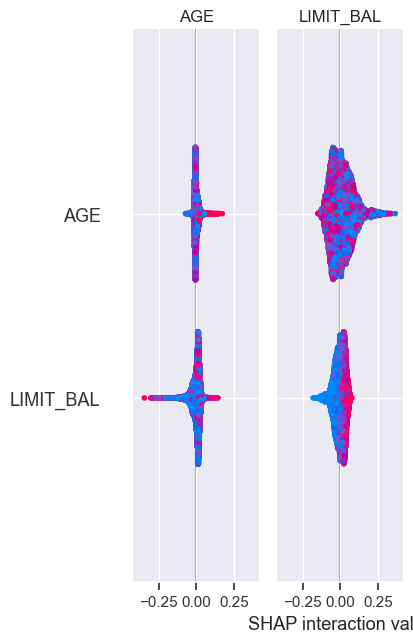

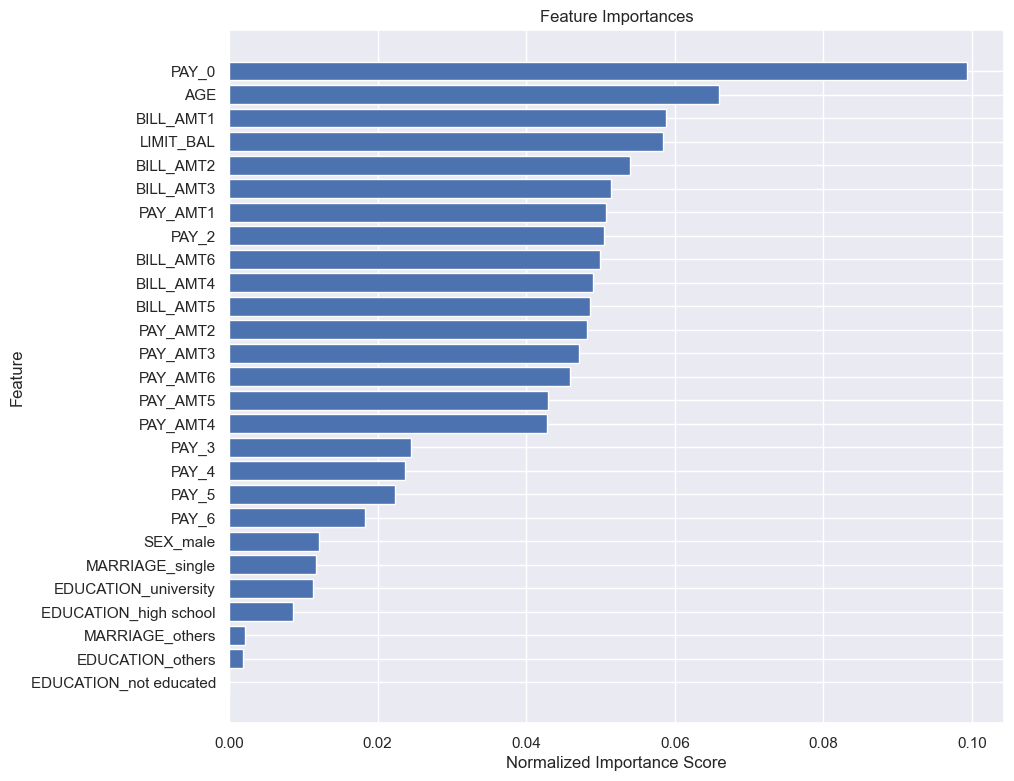

,Feature,Importance
2,PAY_0,0.099364
1,AGE,0.065958
8,BILL_AMT1,0.058835
0,LIMIT_BAL,0.058455
9,BILL_AMT2,0.053998
10,BILL_AMT3,0.051465
14,PAY_AMT1,0.050727
3,PAY_2,0.050461
13,BILL_AMT6,0.049890
11,BILL_AMT4,0.048920


In [73]:
compute_and_plot_shap_and_importances(
            best_xgb_model, model, X_train, feature_names=X_train.columns)

In [75]:
X_train.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_male', 'EDUCATION_high school',
       'EDUCATION_not educated', 'EDUCATION_others', 'EDUCATION_university',
       'MARRIAGE_others', 'MARRIAGE_single'],
      dtype='object')

In [89]:
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve, auc

variables = []
train_gini_scores = []
test_gini_scores = []


for i in X_train[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_male', 'EDUCATION_high school',
         'EDUCATION_university',
        'MARRIAGE_single']]:
    X_train_single_var = X_train[[i]]
    X_test_single_var = X_test[[i]]

    best_xgb_model.fit(X_train_single_var, y_train)
    y_pred_train_single_var = best_lgb_model.predict_proba(X_train_single_var)[:, 1]
    train_roc = roc_auc_score(y_train, y_pred_train_single_var)
    train_gini = 2 * train_roc - 1

    y_pred_test_single_var = best_lgb_model.predict_proba(X_test_single_var)[:, 1]
    test_roc = roc_auc_score(y_test, y_pred_test_single_var)
    test_gini = 2 * test_roc - 1

    variables.append(i)
    train_gini_scores.append(train_gini)
    test_gini_scores.append(test_gini)

results_df = pd.DataFrame({
    'Variable': variables,
    'Train Gini': train_gini_scores,
    'Test Gini': test_gini_scores
})

results_df_sorted = results_df.sort_values(by='Test Gini', ascending=False)

pd.options.display.float_format = '{:.4f}'.format




In [91]:
pd.set_option('display.max_rows', None)

In [97]:
results_df_sorted   

,Variable,Train Gini,Test Gini
14,PAY_AMT1,0.1484,0.1216
15,PAY_AMT2,0.1176,0.1162
17,PAY_AMT4,0.1100,0.1147
16,PAY_AMT3,0.1203,0.1131
19,PAY_AMT6,0.0918,0.1029
18,PAY_AMT5,0.0946,0.0934
23,MARRIAGE_single,0.0368,0.0367
13,BILL_AMT6,0.0053,0.0166
12,BILL_AMT5,0.0142,0.0149
8,BILL_AMT1,0.0127,0.0144


In [99]:
results_df_sorted.Variable.tolist()

['PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT4',
 'PAY_AMT3',
 'PAY_AMT6',
 'PAY_AMT5',
 'MARRIAGE_single',
 'BILL_AMT6',
 'BILL_AMT5',
 'BILL_AMT1',
 'BILL_AMT4',
 'BILL_AMT3',
 'AGE',
 'LIMIT_BAL',
 'BILL_AMT2',
 'EDUCATION_university',
 'EDUCATION_high school',
 'SEX_male',
 'PAY_6',
 'PAY_5',
 'PAY_4',
 'PAY_3',
 'PAY_2',
 'PAY_0']

In [117]:
fin_input = data_dummy[['PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT4',
 'PAY_AMT3',
 'PAY_AMT6',
 'PAY_AMT5',
 'PAY_6',
 'PAY_5',
 'PAY_4',
 'PAY_3',
 'PAY_2',
 'PAY_0']]
fin_output =data_dummy['default']

X_train_uni, X_test_uni, y_train_uni, y_test_uni = train_test_split(fin_input, fin_output, test_size=0.3, random_state=42)

model_fin = best_xgb_model.fit(X_train_uni,y_train_uni)

In [118]:
train_and_evaluate_model('XGB for selected features', model_fin, X_train_uni, y_train_uni, X_test_uni, y_test_uni)

Model Performance for XGB for selected features
Train Gini prob is 63.17510295682656
              precision    recall  f1-score   support

           0       0.84      0.96      0.90     16324
           1       0.71      0.38      0.50      4676

    accuracy                           0.83     21000
   macro avg       0.78      0.67      0.70     21000
weighted avg       0.81      0.83      0.81     21000

[[15605   719]
 [ 2898  1778]]
Model Performance for XGB for selected features
Test Gini prob is 53.2911641929499
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.68      0.35      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.81      0.82      0.80      9000

[[6709  331]
 [1269  691]]


[0.6317510295682656, 0.532911641929499]